## LOAN APPROVAL AUTOMATION BY MACHINE LEARNING

This dataset is from kaggle in which the problem statement is that the company wants to automate the loan approval process by given some information about customers like martial status,how many people dependents,have they employed or not,what are their income etc so i've done some analysis and find out some useful information which is very helpful to extract some important features to train the machine learning model. In this project i'm using two supervised algorithm "Random Forest" and "Decision Tree" so if you're looking plz check my project and if you think that i've done some lil wrongly blunder so plz contact and guide me your guidance is very helpful to my future thank you 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
url='C:\\Users\\Faraz\\Finance_train.csv'
df=pd.read_csv(url)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.shape

(480, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [9]:
df['Dependents'].dtype

dtype('O')

In [10]:
df['Dependents'] = df['Dependents'].str.replace(r'\D', '', regex=True).astype(int)
df['Dependents'].dtype

dtype('int32')

In [11]:
df['CoapplicantIncome'].tail(20)

589       0.0
590    3416.0
591       0.0
593    3300.0
594       0.0
595       0.0
596    1000.0
598       0.0
599       0.0
602       0.0
603    4301.0
604       0.0
606    2500.0
607    1411.0
608    1950.0
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, dtype: float64

In [12]:
df.drop_duplicates(subset="Loan_ID",
                     keep=False, inplace=True)

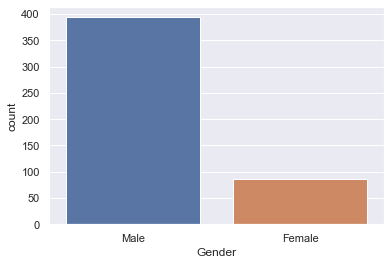

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x='Gender',data=df)
plt.show()

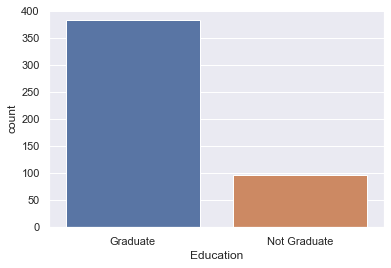

In [14]:
sns.countplot(x='Education',data=df)
plt.show()

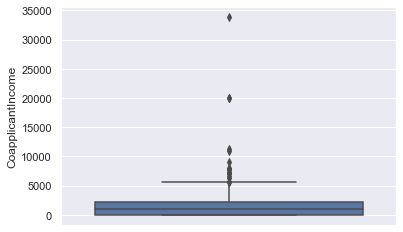

In [15]:
sns.boxplot(y='CoapplicantIncome',data=df)
plt.show()

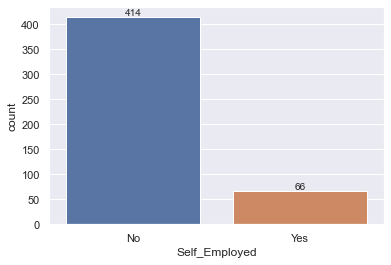

In [16]:
ax=sns.countplot(x='Self_Employed',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

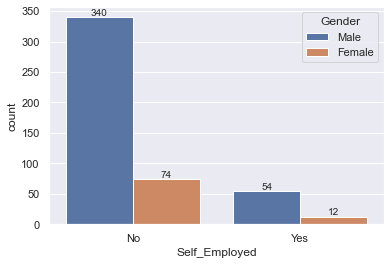

In [17]:
ax=sns.countplot(x='Self_Employed',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

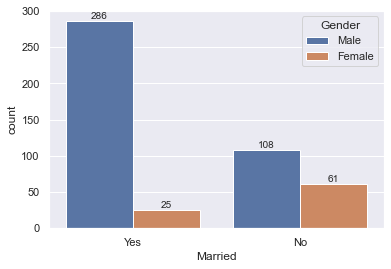

In [18]:
ax=sns.countplot(x='Married',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

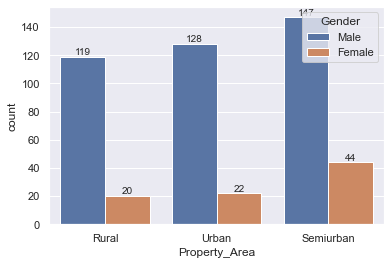

In [19]:
ax=sns.countplot(x='Property_Area',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='LoanAmount'>

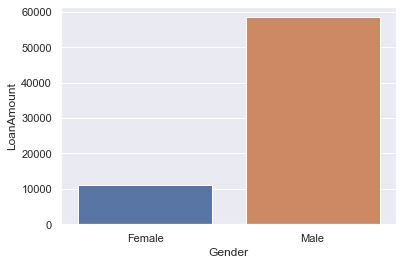

In [20]:
loan_amount=df.groupby('Gender',as_index=False)['LoanAmount'].sum()
sns.barplot(x='Gender',y='LoanAmount',data=loan_amount)

[]

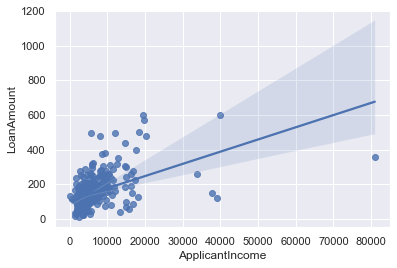

In [21]:
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df)
plt.plot()

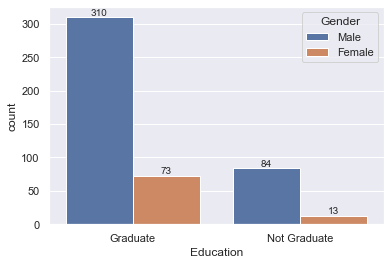

In [22]:
ax=sns.countplot(x='Education',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

[]

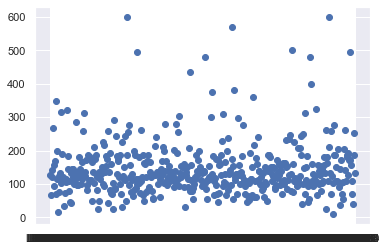

In [23]:
plt.scatter(df['Loan_ID'],df['LoanAmount'])
plt.plot()

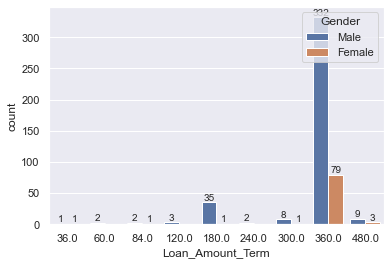

In [24]:
ax=sns.countplot(x='Loan_Amount_Term',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

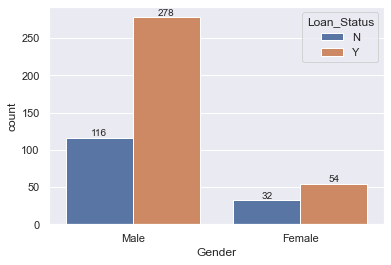

In [25]:
ax=sns.countplot(x='Gender',data=df,hue='Loan_Status')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

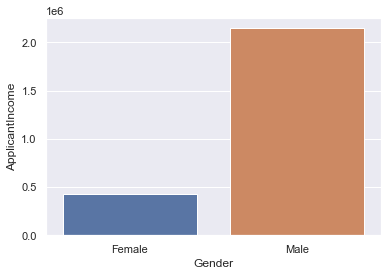

In [26]:
income=df.groupby('Gender',as_index=False)['ApplicantIncome'].sum()
sns.barplot(x='Gender',y='ApplicantIncome',data=income)

In [27]:
income

,Gender,ApplicantIncome
0,Female,427299
1,Male,2147532


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
enco=LabelEncoder()
en=enco.fit_transform(df['Married'])
en

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [30]:
df.select_dtypes(include='float64')

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0
5,4196.0,267.0,360.0,1.0
...,...,...,...,...
609,0.0,71.0,360.0,1.0
610,0.0,40.0,180.0,1.0
611,240.0,253.0,360.0,1.0
612,0.0,187.0,360.0,1.0


In [31]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [34]:
x=df[['Gender','Married','Dependents','Education','Self_Employed']]
y=df['LoanAmount']

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [37]:
ref=RandomForestRegressor()
ref.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
a=ref.predict(X_test)

In [39]:
a.shape

(96,)

In [40]:
y_test.shape

(96,)

In [41]:
lam=np.arange(0,96)
lam

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

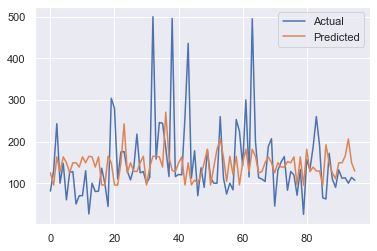

In [42]:
plt.plot(lam,y_test,label='Actual')
plt.plot(lam,a,label='Predicted')
plt.legend()
plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor
ref.score(X_test,y_test)

-0.0032018112498137796

In [44]:
dec=DecisionTreeRegressor(random_state=42)
dec.fit(X_train,y_train)
dec.score(X_test,y_test)

-0.008748857117971687

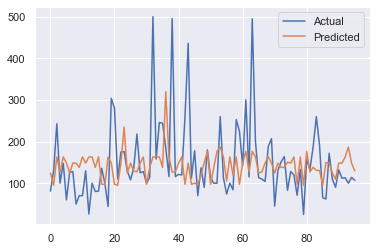

In [45]:

def pelan():
    b=dec.predict(X_test)
    if b.shape==y_test.shape:
        plt.plot(lam,y_test,label='Actual')
        plt.plot(lam,b,label='Predicted')
        plt.legend()
        plt.show
        
pelan()        

In [46]:
a2=dec.predict(X_test)
print("Mean squared value of Random Forest :", mean_squared_error(y_test,a2))

Mean squared value of Random Forest : 8474.961382418003


In [47]:
print("Mean squared value of Decision Tree :",mean_squared_error(y_test,a))

Mean squared value of Decision Tree : 8428.358108285478
